In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import glob, os
import re
import pycountry
import sklearn
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer

In [2]:
data_path = "data/"

In [3]:
df_2015 = pd.read_csv(os.path.join(data_path, "2015.csv"))
df_2016 = pd.read_csv(os.path.join(data_path, "2016.csv"))
df_2017 = pd.read_csv(os.path.join(data_path, "2017.csv"))
df_2018 = pd.read_csv(os.path.join(data_path, "2018.csv"))
df_2019 = pd.read_csv(os.path.join(data_path, "2019.csv"))

###  2015

In [4]:
df_2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [5]:
df_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [6]:
df_2015.isnull().sum() 

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [7]:
df_2015.duplicated().sum()

np.int64(0)

In [8]:
df_2015.shape

(158, 12)

In [9]:
df_2015.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


### 2016

In [10]:
df_2016.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [11]:
df_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        157 non-null    object 
 1   Region                         157 non-null    object 
 2   Happiness Rank                 157 non-null    int64  
 3   Happiness Score                157 non-null    float64
 4   Lower Confidence Interval      157 non-null    float64
 5   Upper Confidence Interval      157 non-null    float64
 6   Economy (GDP per Capita)       157 non-null    float64
 7   Family                         157 non-null    float64
 8   Health (Life Expectancy)       157 non-null    float64
 9   Freedom                        157 non-null    float64
 10  Trust (Government Corruption)  157 non-null    float64
 11  Generosity                     157 non-null    float64
 12  Dystopia Residual              157 non-null    flo

In [12]:
df_2016.describe()

,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,78.980892,5.382185,5.282395,5.481975,0.953880,0.793621,0.557619,0.370994,0.137624,0.242635,2.325807
std,45.466030,1.141674,1.148043,1.136493,0.412595,0.266706,0.229349,0.145507,0.111038,0.133756,0.542220
min,1.000000,2.905000,2.732000,3.078000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.817890
25%,40.000000,4.404000,4.327000,4.465000,0.670240,0.641840,0.382910,0.257480,0.061260,0.154570,2.031710
50%,79.000000,5.314000,5.237000,5.419000,1.027800,0.841420,0.596590,0.397470,0.105470,0.222450,2.290740
75%,118.000000,6.269000,6.154000,6.434000,1.279640,1.021520,0.729930,0.484530,0.175540,0.311850,2.664650
max,157.000000,7.526000,7.460000,7.669000,1.824270,1.183260,0.952770,0.608480,0.505210,0.819710,3.837720


In [13]:
df_2016.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Lower Confidence Interval        0
Upper Confidence Interval        0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [14]:
df_2016.shape

(157, 13)

In [15]:
df_2016.duplicated().sum()

np.int64(0)

### 2017

In [16]:
df_2017.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [17]:
df_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        155 non-null    object 
 1   Happiness.Rank                 155 non-null    int64  
 2   Happiness.Score                155 non-null    float64
 3   Whisker.high                   155 non-null    float64
 4   Whisker.low                    155 non-null    float64
 5   Economy..GDP.per.Capita.       155 non-null    float64
 6   Family                         155 non-null    float64
 7   Health..Life.Expectancy.       155 non-null    float64
 8   Freedom                        155 non-null    float64
 9   Generosity                     155 non-null    float64
 10  Trust..Government.Corruption.  155 non-null    float64
 11  Dystopia.Residual              155 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 

In [18]:
df_2017.shape

(155, 12)

In [19]:
df_2017.describe()

,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,78.000000,5.354019,5.452326,5.255713,0.984718,1.188898,0.551341,0.408786,0.246883,0.123120,1.850238
std,44.888751,1.131230,1.118542,1.145030,0.420793,0.287263,0.237073,0.149997,0.134780,0.101661,0.500028
min,1.000000,2.693000,2.864884,2.521116,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377914
25%,39.500000,4.505500,4.608172,4.374955,0.663371,1.042635,0.369866,0.303677,0.154106,0.057271,1.591291
50%,78.000000,5.279000,5.370032,5.193152,1.064578,1.253918,0.606042,0.437454,0.231538,0.089848,1.832910
75%,116.500000,6.101500,6.194600,6.006527,1.318027,1.414316,0.723008,0.516561,0.323762,0.153296,2.144654
max,155.000000,7.537000,7.622030,7.479556,1.870766,1.610574,0.949492,0.658249,0.838075,0.464308,3.117485


In [20]:
df_2017.duplicated().sum()

np.int64(0)

In [21]:
df_2017.isnull().sum()

Country                          0
Happiness.Rank                   0
Happiness.Score                  0
Whisker.high                     0
Whisker.low                      0
Economy..GDP.per.Capita.         0
Family                           0
Health..Life.Expectancy.         0
Freedom                          0
Generosity                       0
Trust..Government.Corruption.    0
Dystopia.Residual                0
dtype: int64

### 2018


In [22]:
df_2018.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


In [23]:
df_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     155 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [24]:
df_2018.duplicated().sum()

np.int64(0)

In [25]:
df_2018.isnull().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       1
dtype: int64

In [26]:
df_2018[df_2018['Perceptions of corruption'].isnull()]

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
19,20,United Arab Emirates,6.774,2.096,0.776,0.67,0.284,0.186,NaN


In [27]:
df_2018.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,155.000000
mean,78.500000,5.375917,0.891449,1.213237,0.597346,0.454506,0.181006,0.112000
std,45.177428,1.119506,0.391921,0.302372,0.247579,0.162424,0.098471,0.096492
min,1.000000,2.905000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.453750,0.616250,1.066750,0.422250,0.356000,0.109500,0.051000
50%,78.500000,5.378000,0.949500,1.255000,0.644000,0.487000,0.174000,0.082000
75%,117.250000,6.168500,1.197750,1.463000,0.777250,0.578500,0.239000,0.137000
max,156.000000,7.632000,2.096000,1.644000,1.030000,0.724000,0.598000,0.457000


In [28]:
df_2018.shape

(156, 9)

### 2019

In [29]:
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [30]:
df_2019.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


In [31]:
df_2019.isnull().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

In [32]:
df_2019.duplicated().sum()

np.int64(0)

In [33]:
df_2019.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [34]:
df_2019.shape

(156, 9)

### Graphics

In [35]:
def standardize_columns(df, year):

    df.columns = [re.sub(r"[\.\(\)]", "", c).strip().lower() for c in df.columns]

    if year == 2015:
        rename_map = {
            "country": "country",
            "region": "region",
            "happiness rank": "happiness_rank",
            "happiness score": "happiness_score",
            "economy gdp per capita": "gdp_per_capita",
            "family": "social_support",
            "health life expectancy": "health_life_expectancy",
            "freedom": "freedom",
            "trust government corruption": "corruption",
            "generosity": "generosity",
            "dystopia residual": "dystopia_residual",
            "standard error": "standard_error",
        }

    elif year == 2016:
        rename_map = {
            "country": "country",
            "region": "region",
            "happiness rank": "happiness_rank",
            "happiness score": "happiness_score",
            "economy gdp per capita": "gdp_per_capita",
            "family": "social_support",
            "health life expectancy": "health_life_expectancy",
            "freedom": "freedom",
            "trust government corruption": "corruption",
            "generosity": "generosity",
            "dystopia residual": "dystopia_residual",
        }

    elif year == 2017:
        rename_map = {
            "country": "country",
            "happinessrank": "happiness_rank",
            "happinessscore": "happiness_score",
            "economygdppercapita": "gdp_per_capita",
            "family": "social_support",
            "healthlifeexpectancy": "health_life_expectancy",
            "freedom": "freedom",
            "trustgovernmentcorruption": "corruption",
            "generosity": "generosity",
            "dystopiaresidual": "dystopia_residual",
        }

    elif year in [2018, 2019]:
        rename_map = {
            "country or region": "country",
            "overall rank": "happiness_rank",
            "score": "happiness_score",
            "gdp per capita": "gdp_per_capita",
            "social support": "social_support",
            "healthy life expectancy": "health_life_expectancy",
            "freedom to make life choices": "freedom",
            "perceptions of corruption": "corruption",
            "generosity": "generosity",
        }

    else:
        raise ValueError("Solo se admiten años entre 2015 y 2019.")

    df.rename(columns=rename_map, inplace=True)

    if "year" in df.columns:
        df.drop(columns=["year"], inplace=True)
    df["year"] = year

    ordered_cols = [
        "country", "region", "happiness_rank", "happiness_score",
        "standard_error", "gdp_per_capita", "social_support",
        "health_life_expectancy", "freedom", "corruption",
        "generosity", "dystopia_residual", "year"
    ]
    df = df[[c for c in ordered_cols if c in df.columns]]

    print(f"\nColumnas estandarizadas para {year}:")
    print(df.columns.tolist())

    return df

In [36]:
df_2015_clean = standardize_columns(df_2015, 2015)
df_2016_clean = standardize_columns(df_2016, 2016)
df_2017_clean = standardize_columns(df_2017, 2017)
df_2018_clean = standardize_columns(df_2018, 2018)
df_2019_clean = standardize_columns(df_2019, 2019)


Columnas estandarizadas para 2015:
['country', 'region', 'happiness_rank', 'happiness_score', 'standard_error', 'gdp_per_capita', 'social_support', 'health_life_expectancy', 'freedom', 'corruption', 'generosity', 'dystopia_residual', 'year']

Columnas estandarizadas para 2016:
['country', 'region', 'happiness_rank', 'happiness_score', 'gdp_per_capita', 'social_support', 'health_life_expectancy', 'freedom', 'corruption', 'generosity', 'dystopia_residual', 'year']

Columnas estandarizadas para 2017:
['country', 'happiness_rank', 'happiness_score', 'gdp_per_capita', 'social_support', 'health_life_expectancy', 'freedom', 'corruption', 'generosity', 'dystopia_residual', 'year']

Columnas estandarizadas para 2018:
['country', 'happiness_rank', 'happiness_score', 'gdp_per_capita', 'social_support', 'health_life_expectancy', 'freedom', 'corruption', 'generosity', 'year']

Columnas estandarizadas para 2019:
['country', 'happiness_rank', 'happiness_score', 'gdp_per_capita', 'social_support', 'h

In [37]:
df_2015.head()

,country,region,happiness_rank,happiness_score,standard_error,gdp_per_capita,social_support,health_life_expectancy,freedom,corruption,generosity,dystopia_residual,year
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015


In [38]:
df_2016.head()

,country,region,happiness_rank,happiness_score,lower confidence interval,upper confidence interval,gdp_per_capita,social_support,health_life_expectancy,freedom,corruption,generosity,dystopia_residual,year
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939,2016
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463,2016
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,2016
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465,2016
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596,2016


In [39]:
df_2017.head()

,country,happiness_rank,happiness_score,whiskerhigh,whiskerlow,gdp_per_capita,social_support,health_life_expectancy,freedom,generosity,corruption,dystopia_residual,year
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,2017
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,2017
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,2017
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,2017
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,2017


In [40]:
df_2018.head()

,happiness_rank,country,happiness_score,gdp_per_capita,social_support,health_life_expectancy,freedom,generosity,corruption,year
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393,2018
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340,2018
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408,2018
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138,2018
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357,2018


In [41]:
df_2019.head()

,happiness_rank,country,happiness_score,gdp_per_capita,social_support,health_life_expectancy,freedom,generosity,corruption,year
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,2019
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,2019
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,2019
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,2019
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,2019


In [42]:
dfs_clean = {
    2015: df_2015_clean,
    2016: df_2016_clean,
    2017: df_2017_clean,
    2018: df_2018_clean,
    2019: df_2019_clean
}


 Matriz de correlación 2015 


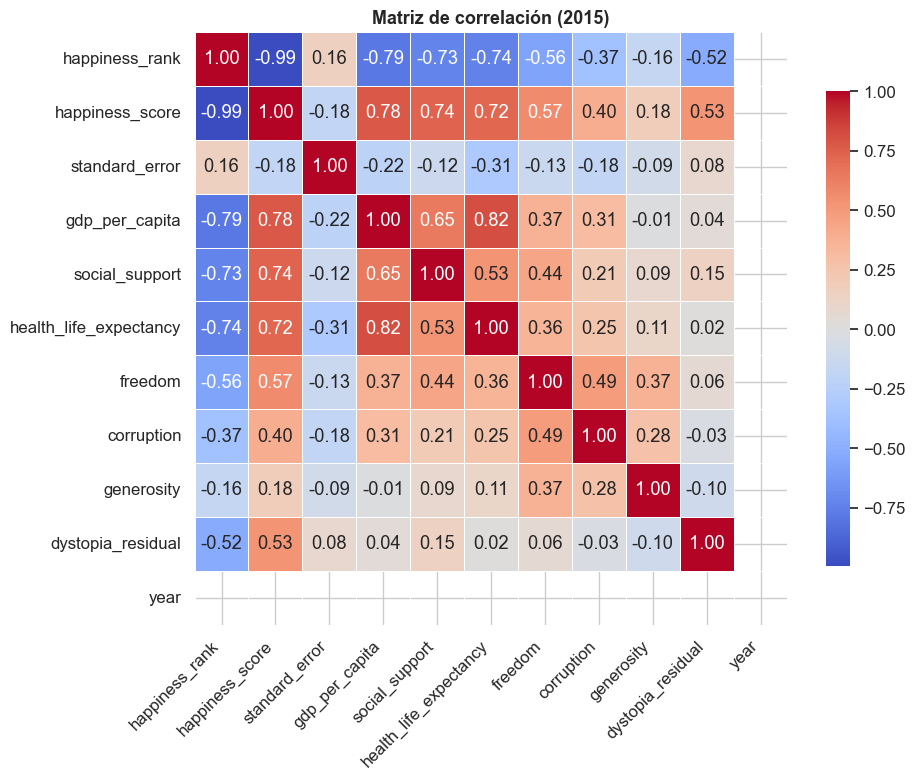


 Matriz de correlación 2016 


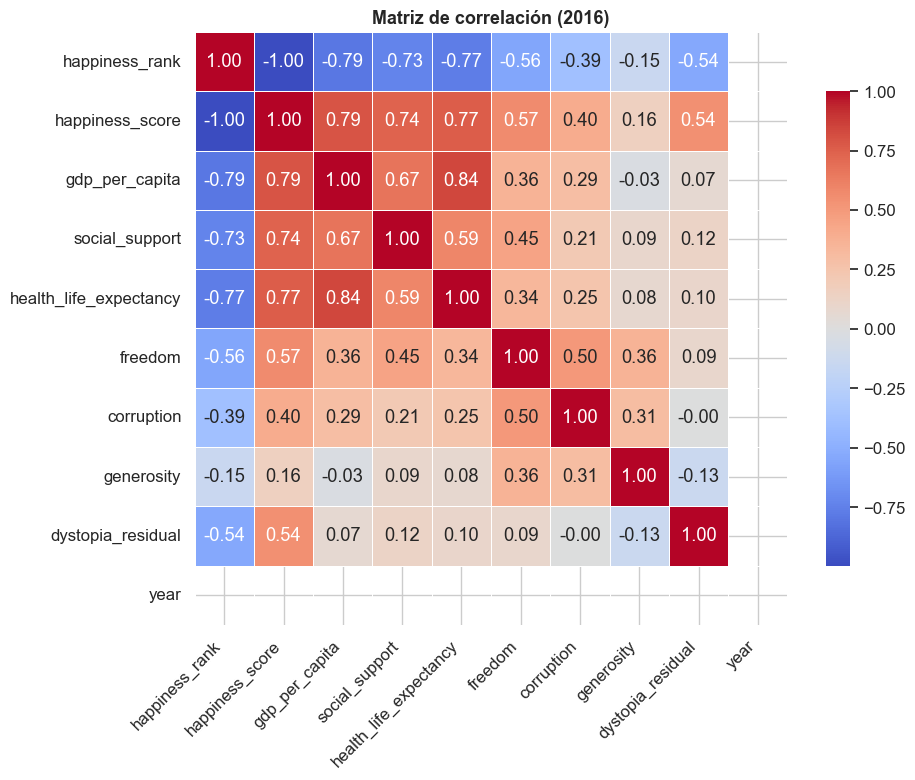


 Matriz de correlación 2017 


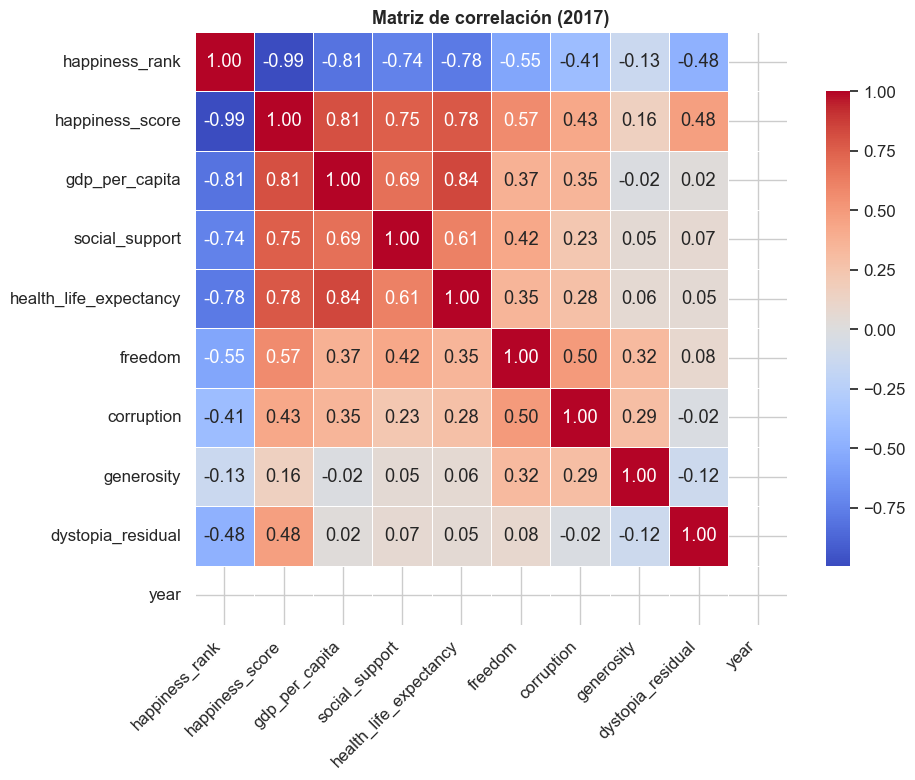


 Matriz de correlación 2018 


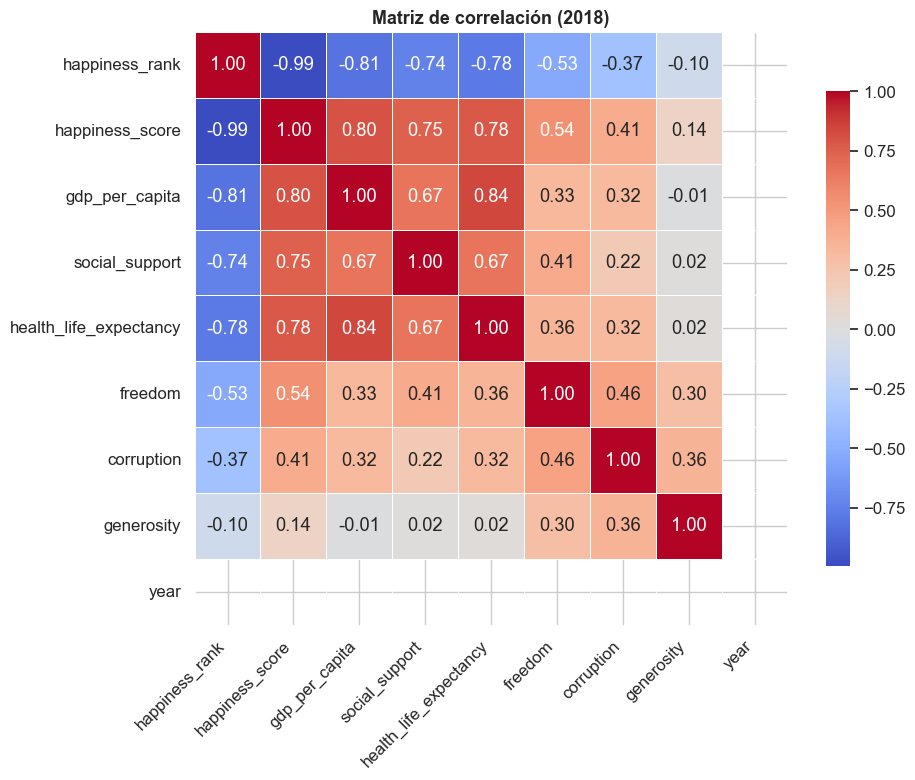


 Matriz de correlación 2019 


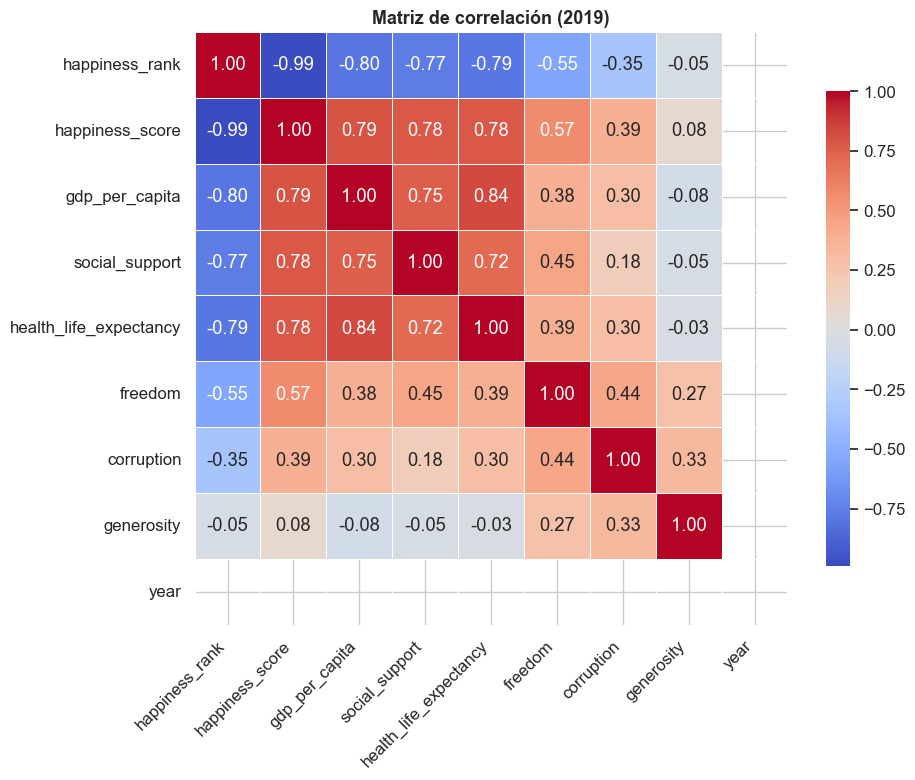

In [43]:
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.1)

for year, df in dfs_clean.items():
    print(f"\n Matriz de correlación {year} ")

    num_cols = df.select_dtypes(include=['float64', 'int64']).columns

    corr = df[num_cols].corr()

    plt.figure(figsize=(10,8))
    sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f",
                linewidths=0.5, square=True, cbar_kws={'shrink':0.8})
    plt.title(f"Matriz de correlación ({year})", fontsize=13, weight='bold')
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()


 DISTRIBUCIÓN DE VARIABLES NUMÉRICAS (2015) 


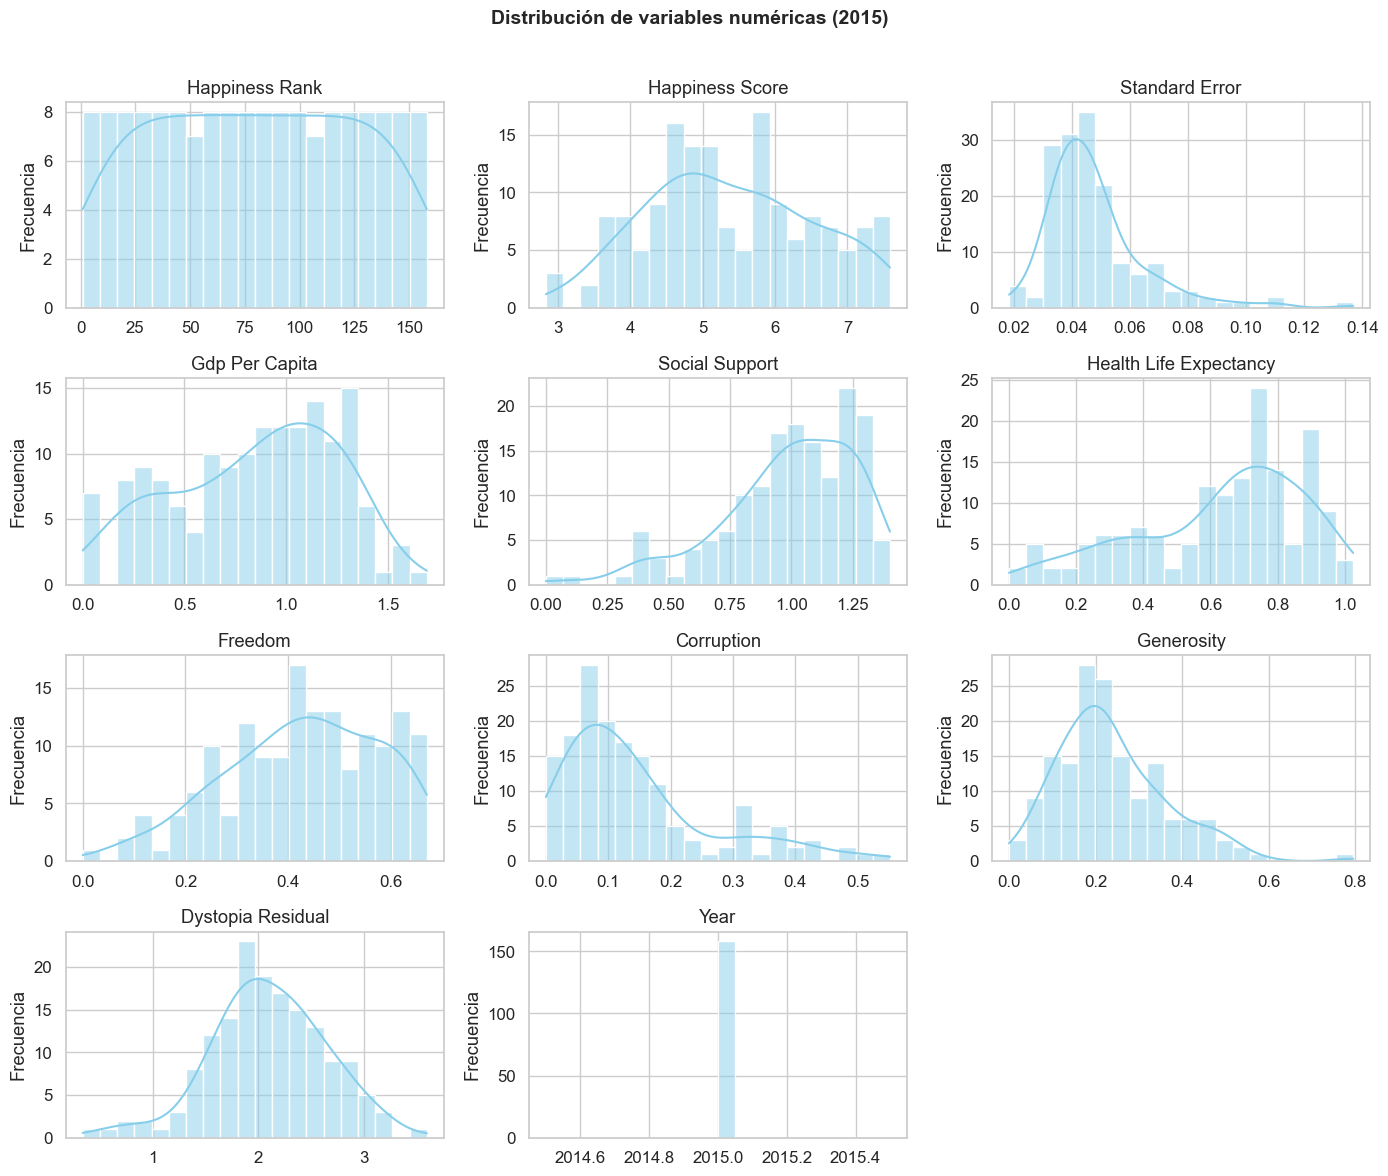


 DISTRIBUCIÓN DE VARIABLES NUMÉRICAS (2016) 


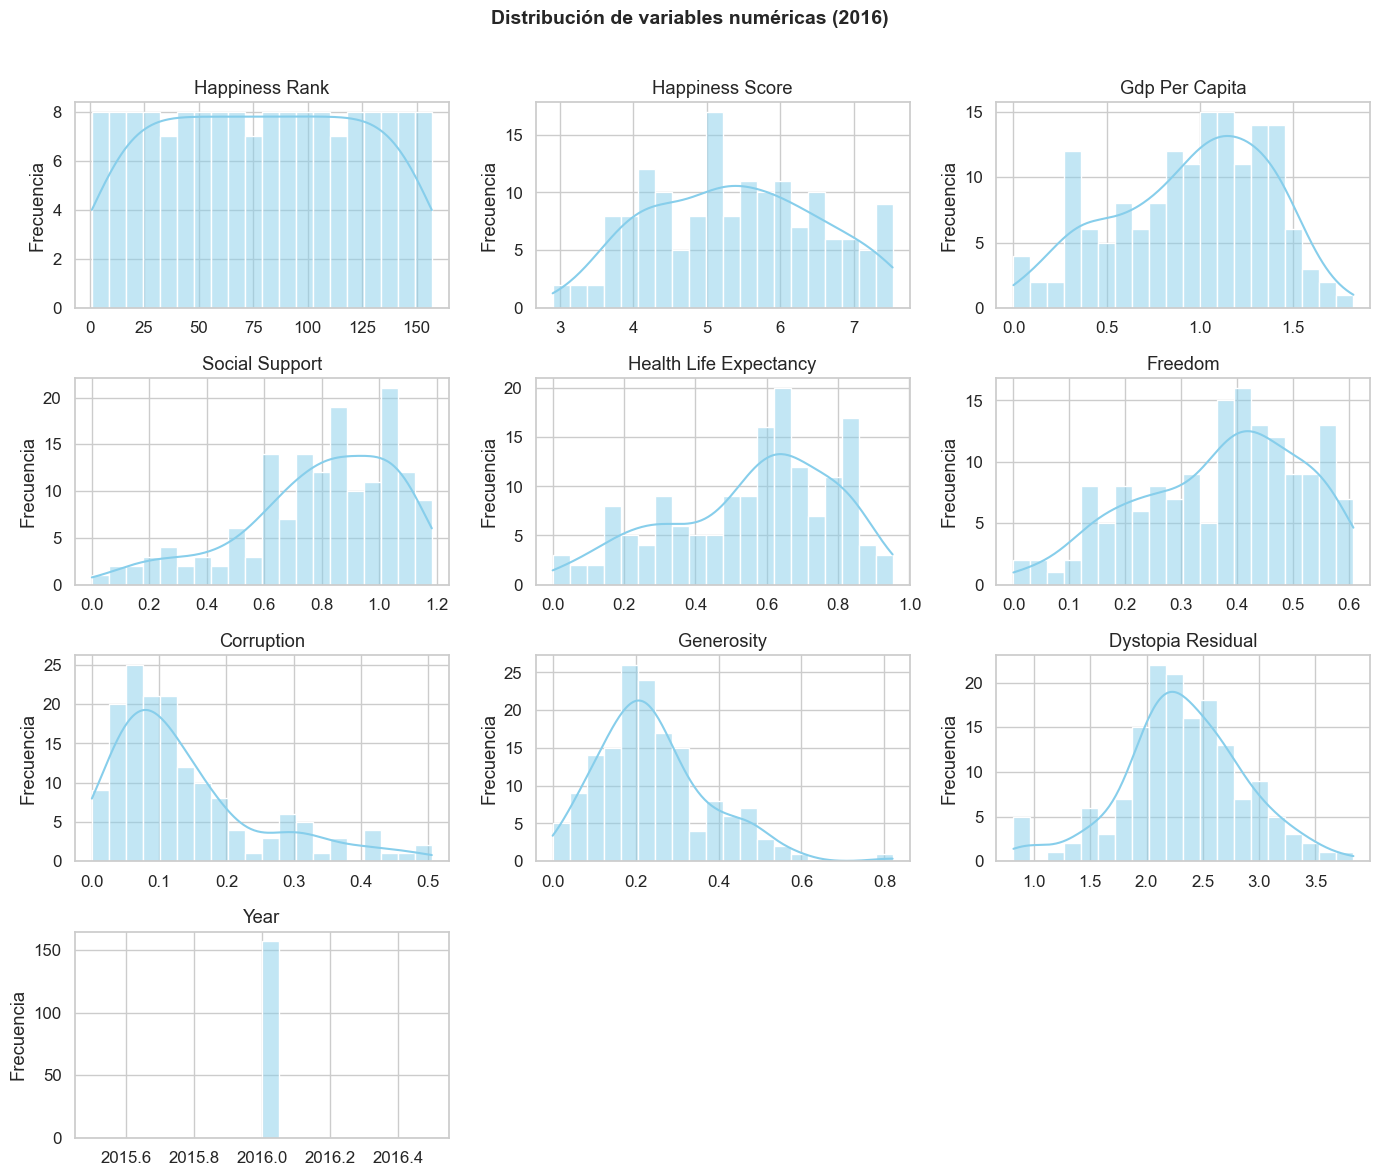


 DISTRIBUCIÓN DE VARIABLES NUMÉRICAS (2017) 


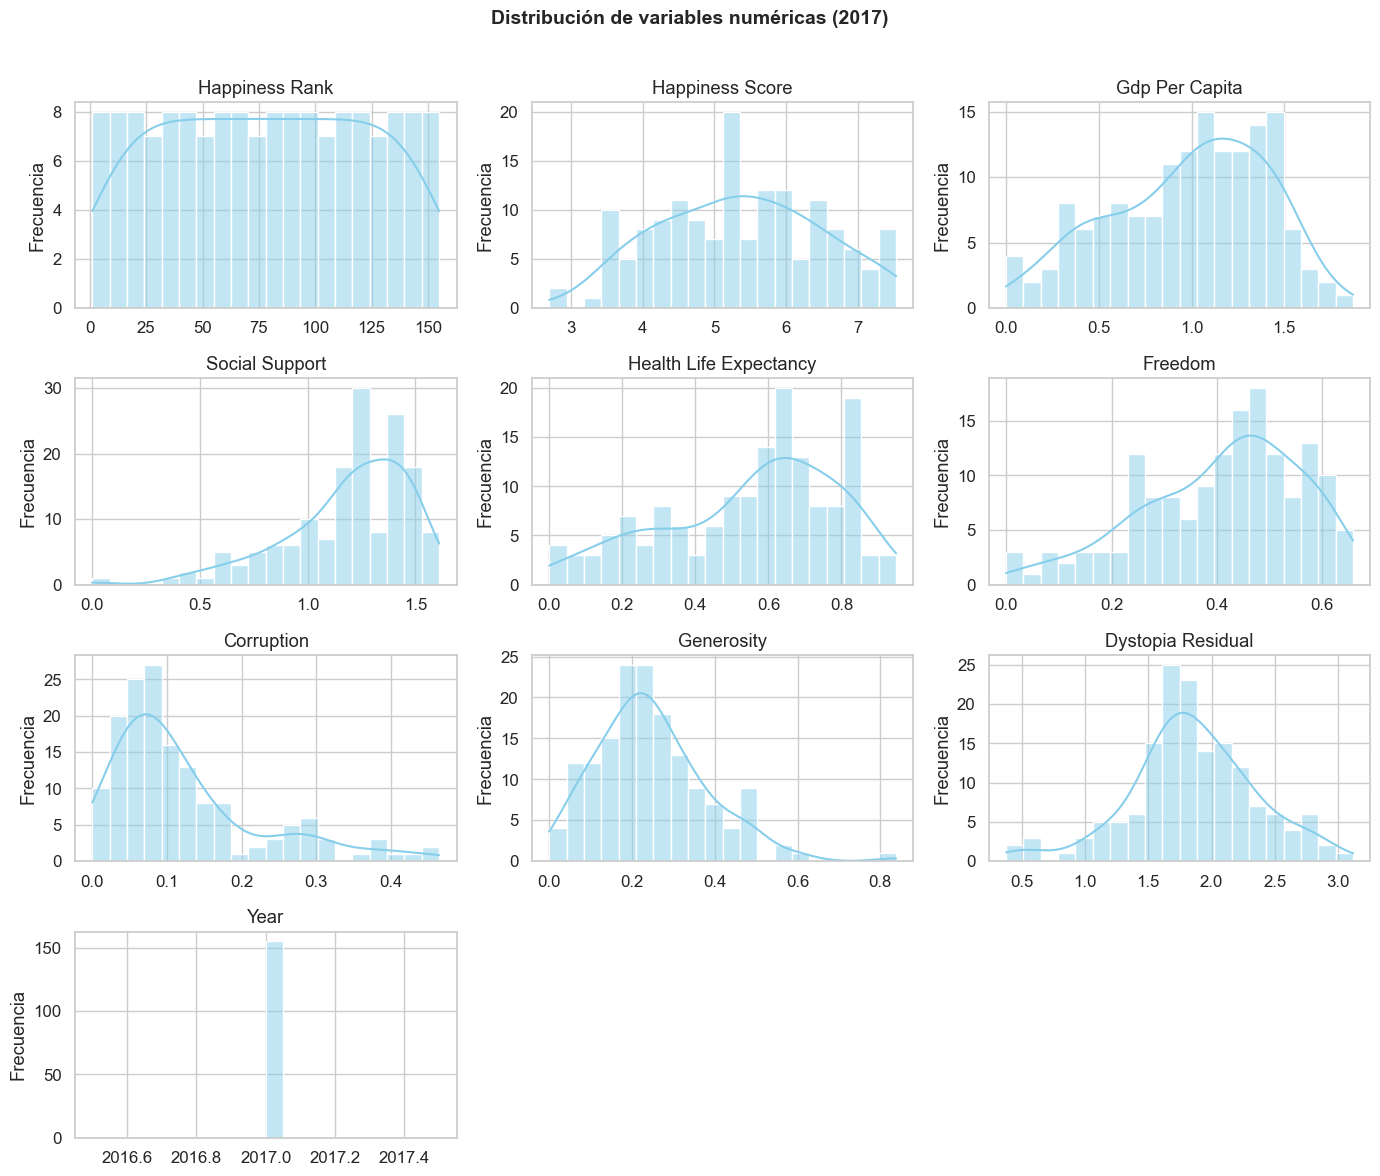


 DISTRIBUCIÓN DE VARIABLES NUMÉRICAS (2018) 


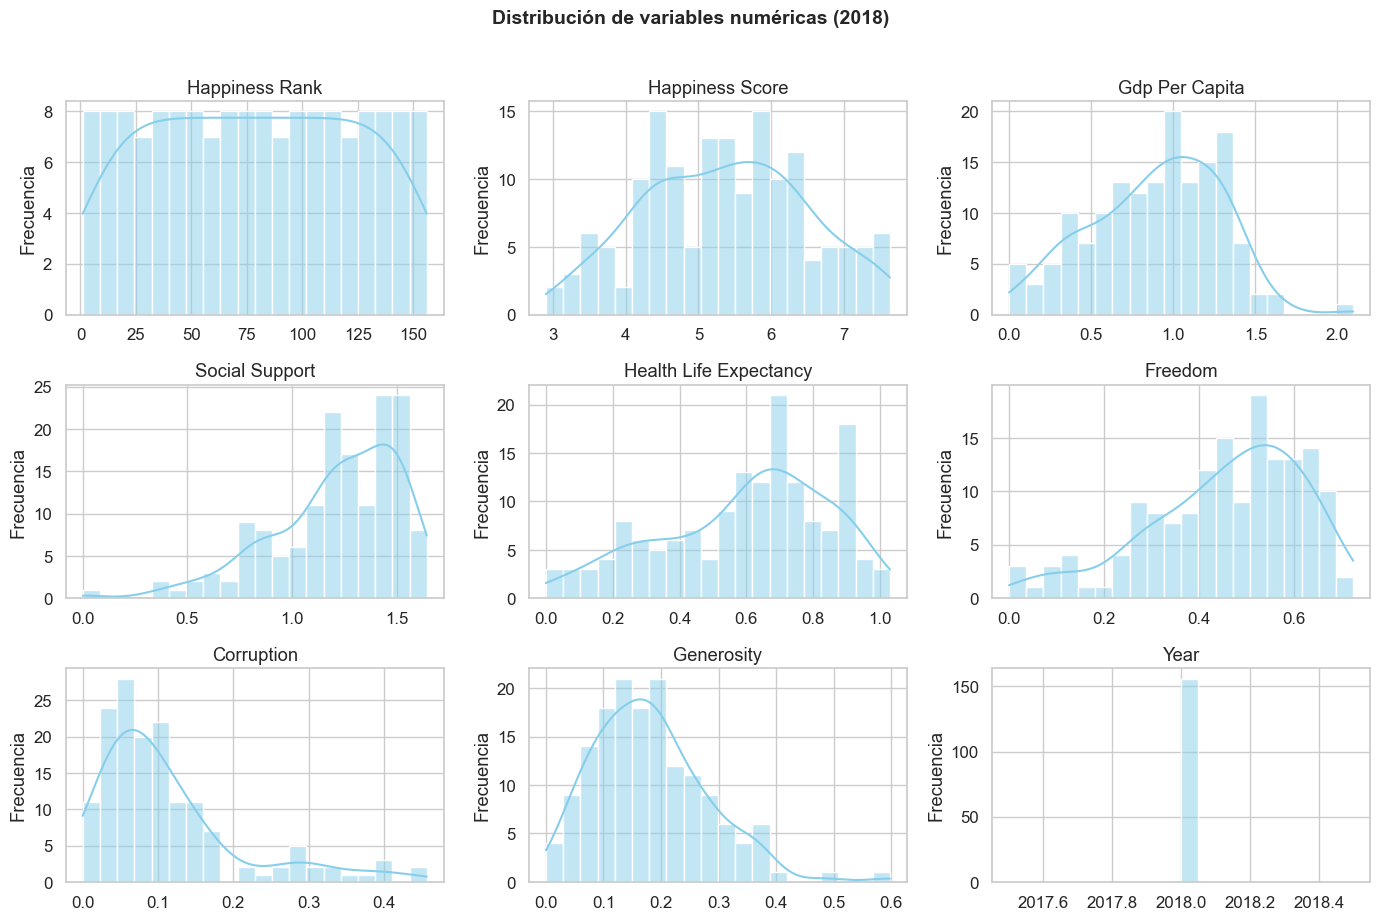


 DISTRIBUCIÓN DE VARIABLES NUMÉRICAS (2019) 


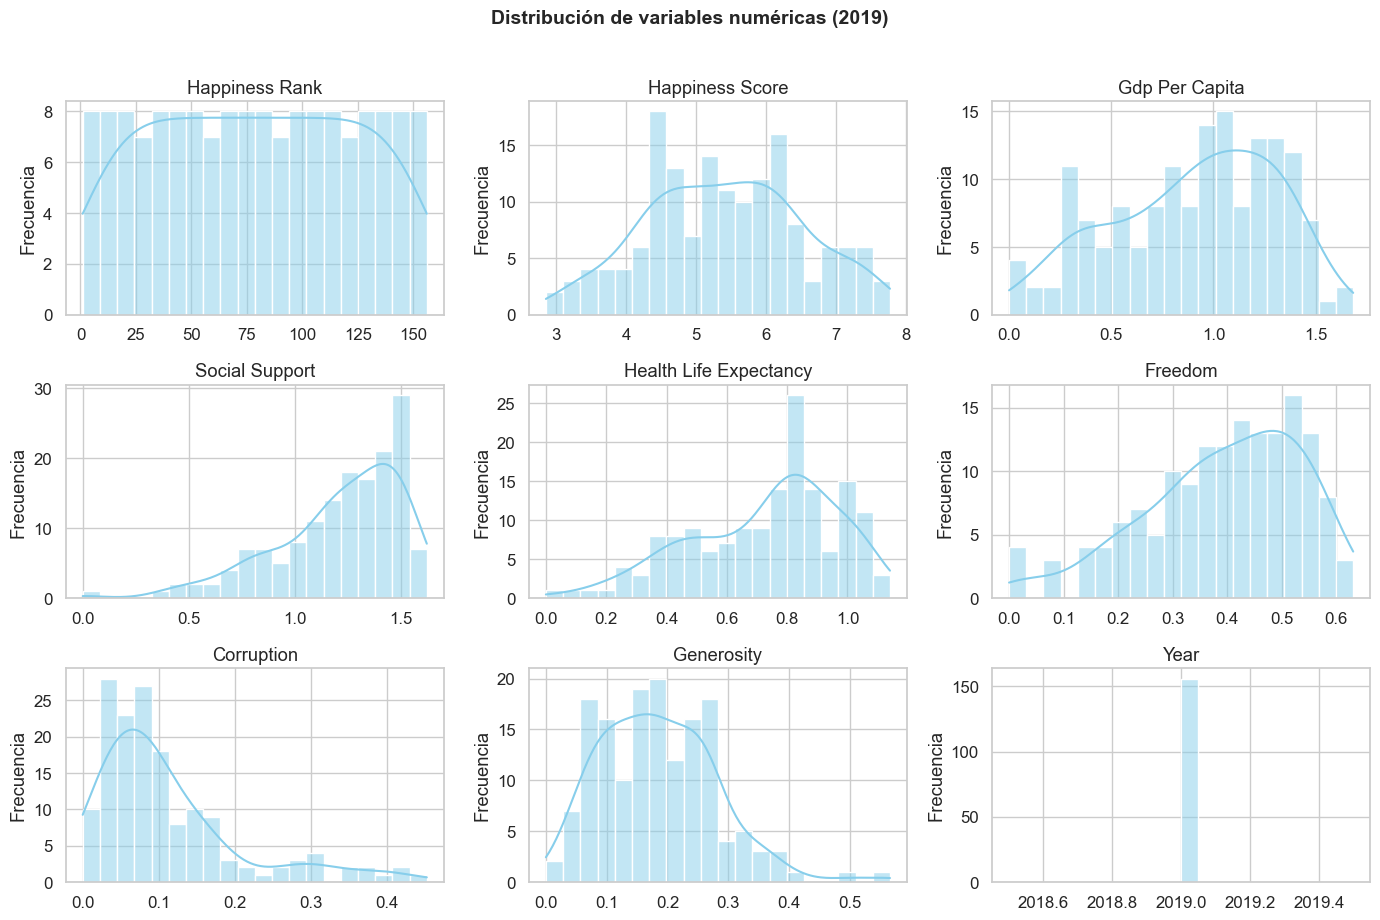

In [44]:
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.1)

for year, df in dfs_clean.items():
    print(f"\n DISTRIBUCIÓN DE VARIABLES NUMÉRICAS ({year}) ")

    # Seleccionamos solo las columnas numéricas
    numeric_cols = df.select_dtypes(include=["float64", "int64"]).columns
    n_cols = 3  # número de columnas por fila en la cuadrícula
    n_rows = int(len(numeric_cols) / n_cols) + 1

    # Crear figura
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, n_rows * 3))
    axes = axes.flatten()

    for i, col in enumerate(numeric_cols):
        sns.histplot(df[col], bins=20, kde=True, color="skyblue", ax=axes[i])
        axes[i].set_title(col.replace("_", " ").title())
        axes[i].set_xlabel("")
        axes[i].set_ylabel("Frecuencia")

    # Eliminar subplots vacíos
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    fig.suptitle(f"Distribución de variables numéricas ({year})", fontsize=14, weight="bold")
    plt.tight_layout(rect=[0, 0, 1, 0.97])
    plt.show()



 BOXPLOTS DE VARIABLES NUMÉRICAS (2015) 


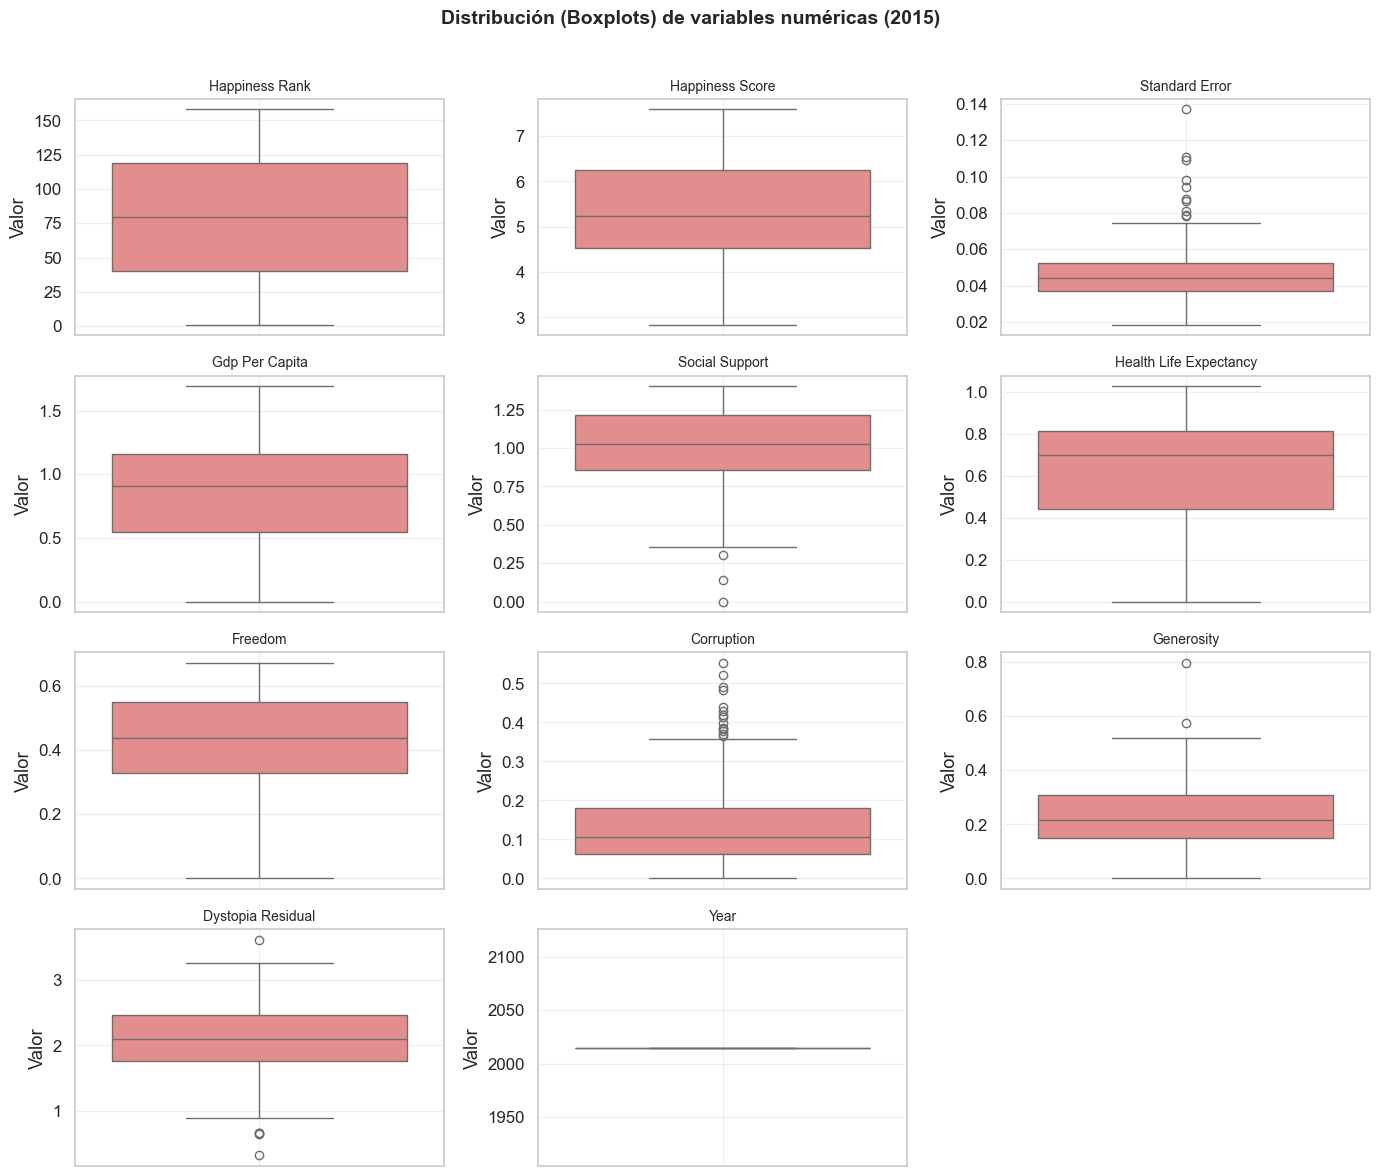


 BOXPLOTS DE VARIABLES NUMÉRICAS (2016) 


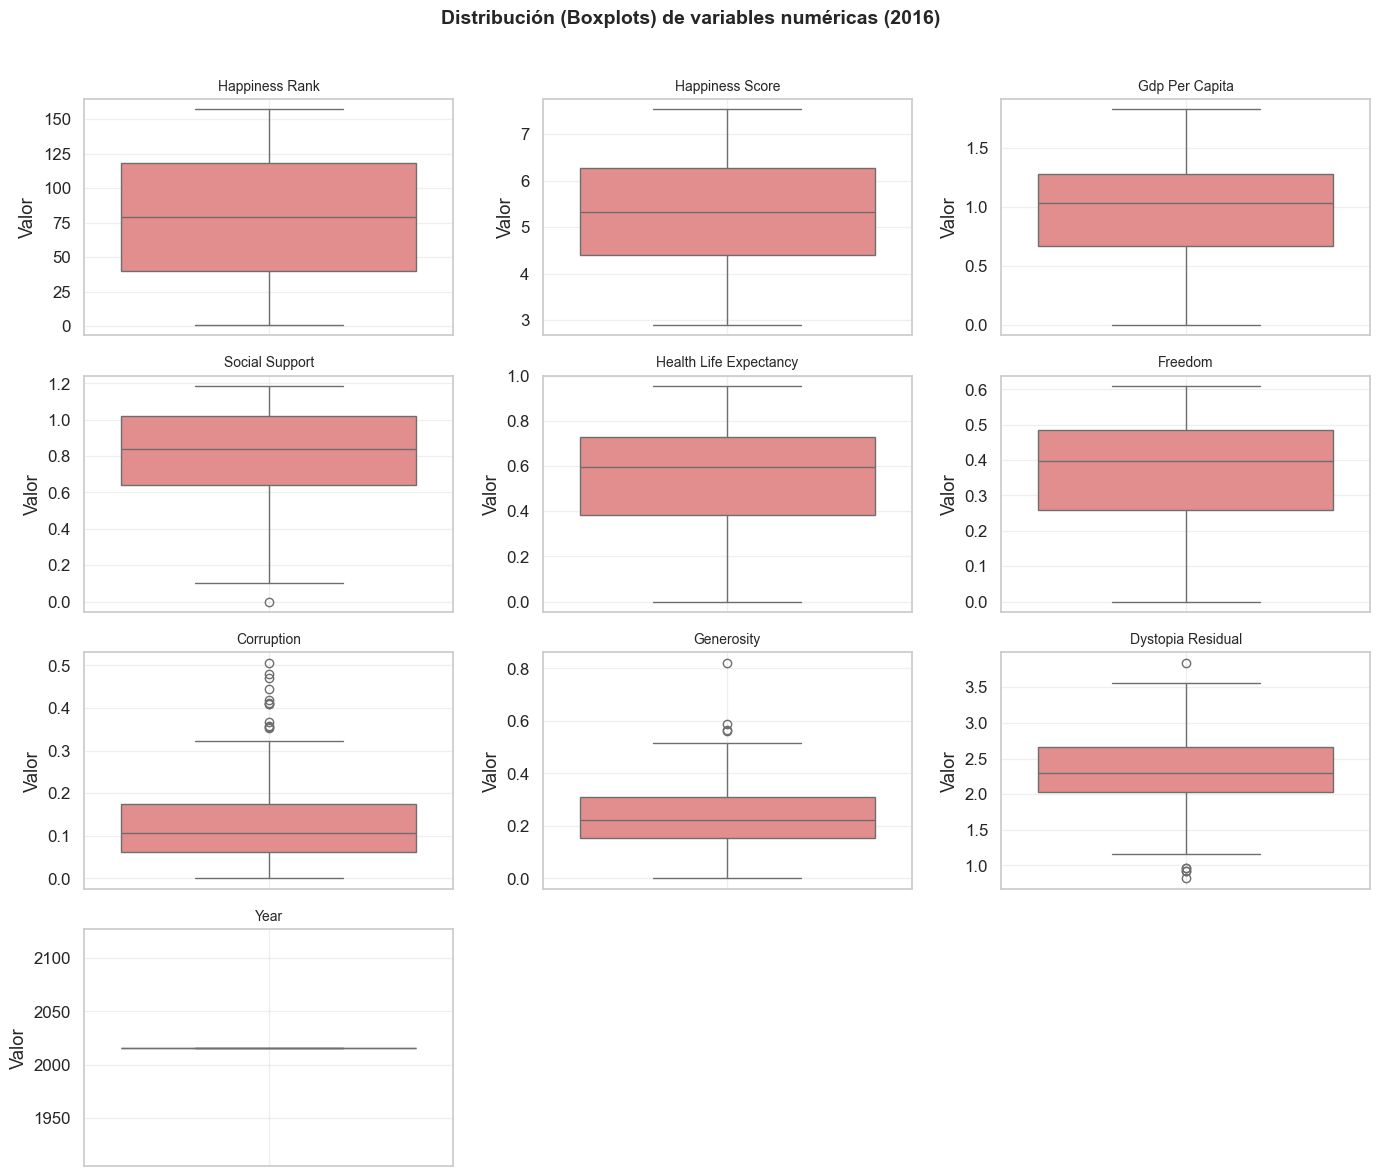


 BOXPLOTS DE VARIABLES NUMÉRICAS (2017) 


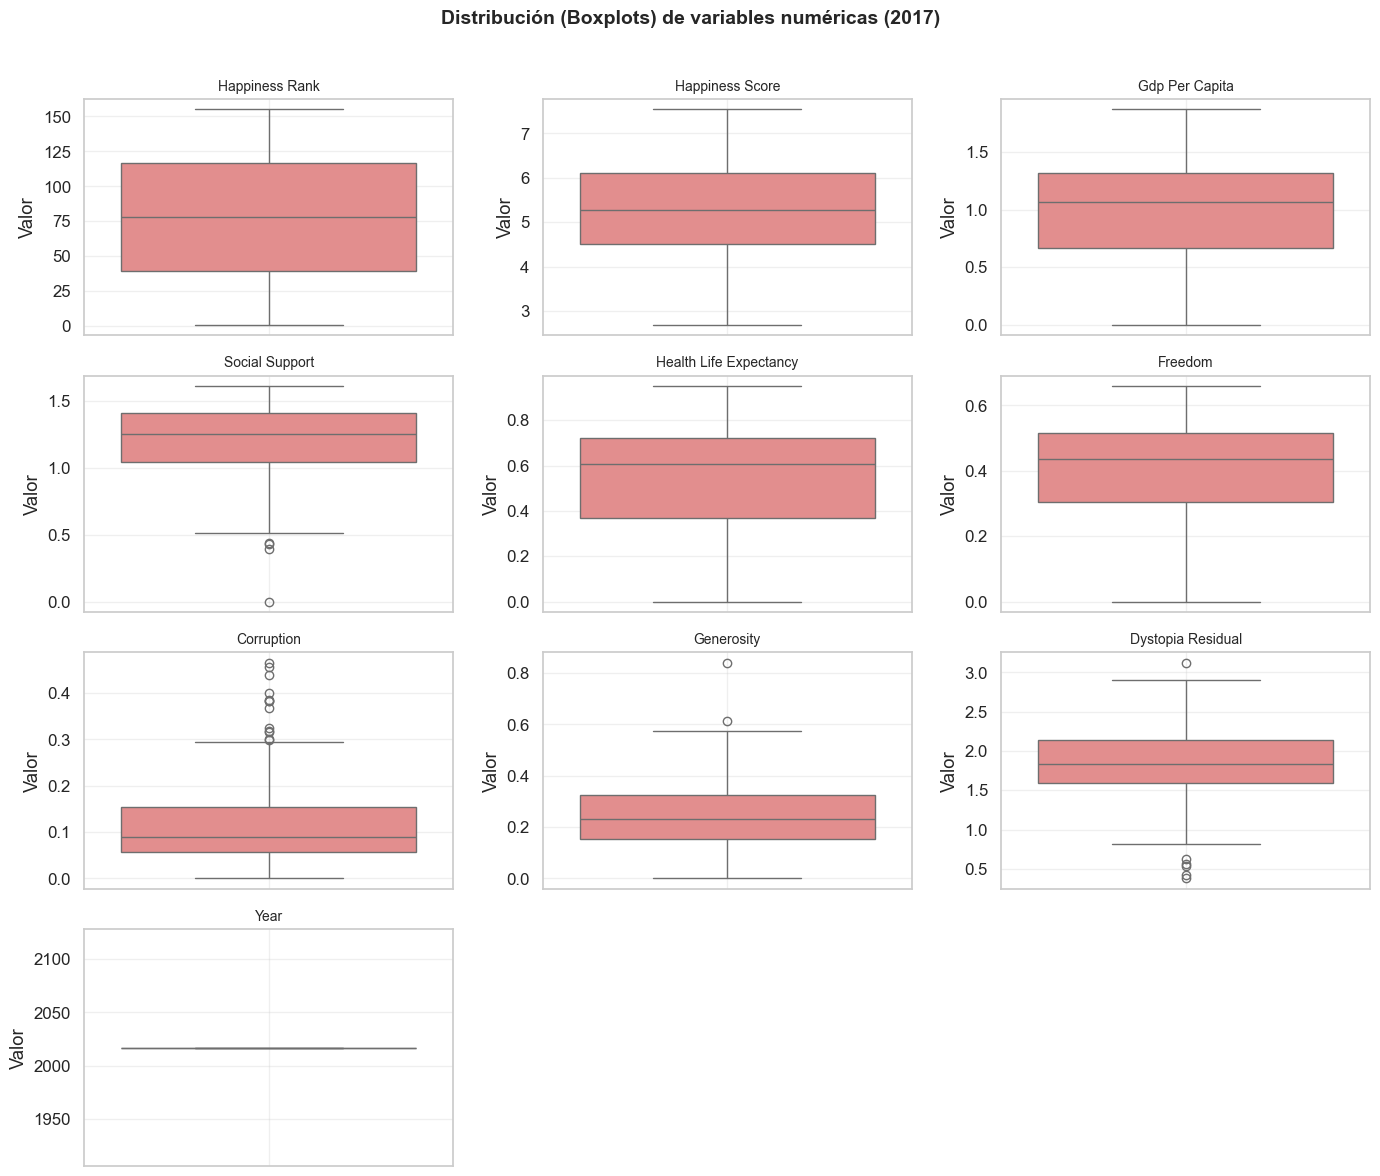


 BOXPLOTS DE VARIABLES NUMÉRICAS (2018) 


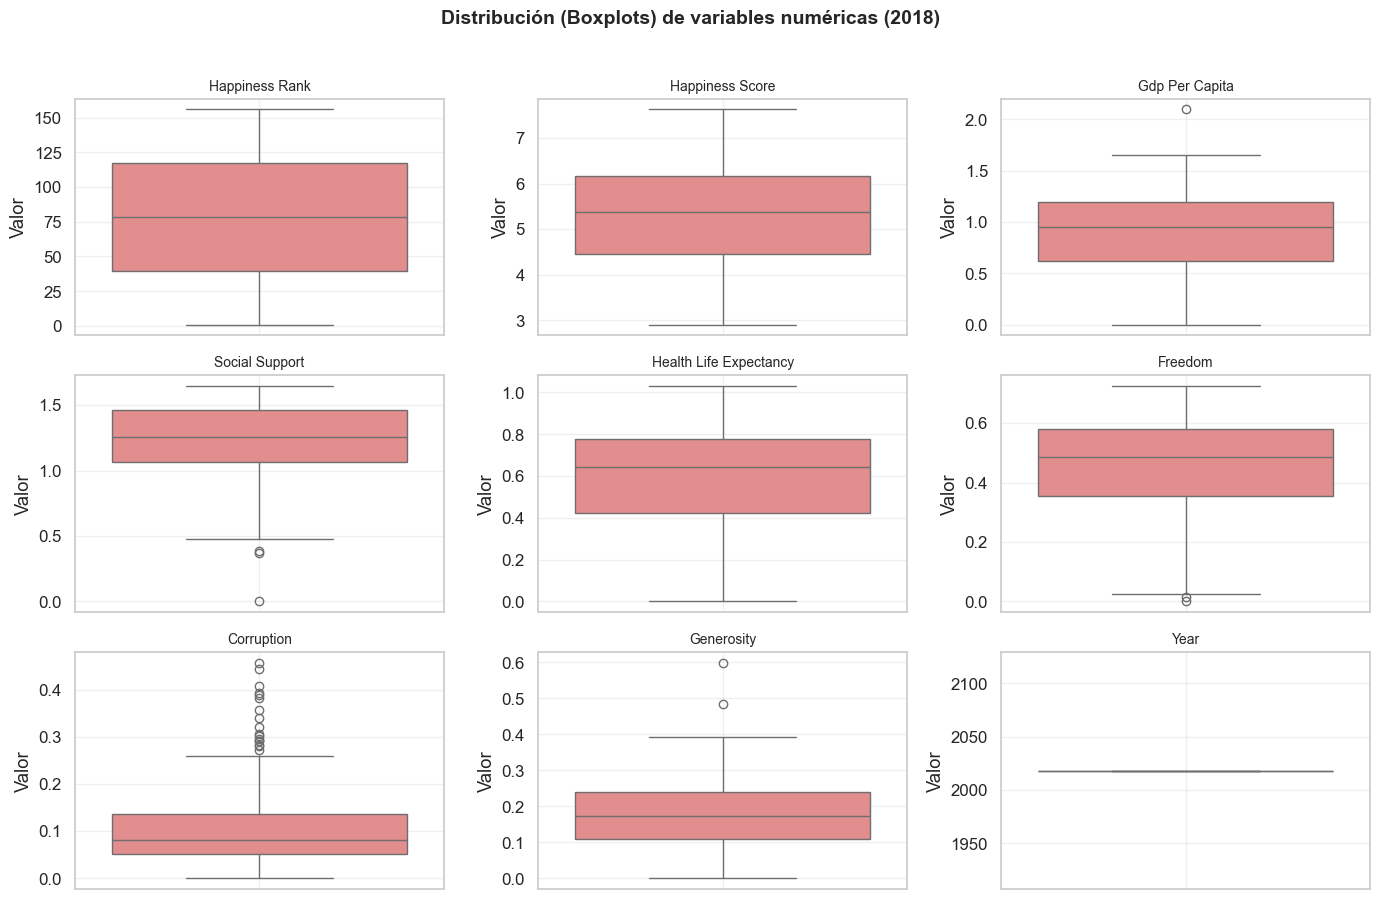


 BOXPLOTS DE VARIABLES NUMÉRICAS (2019) 


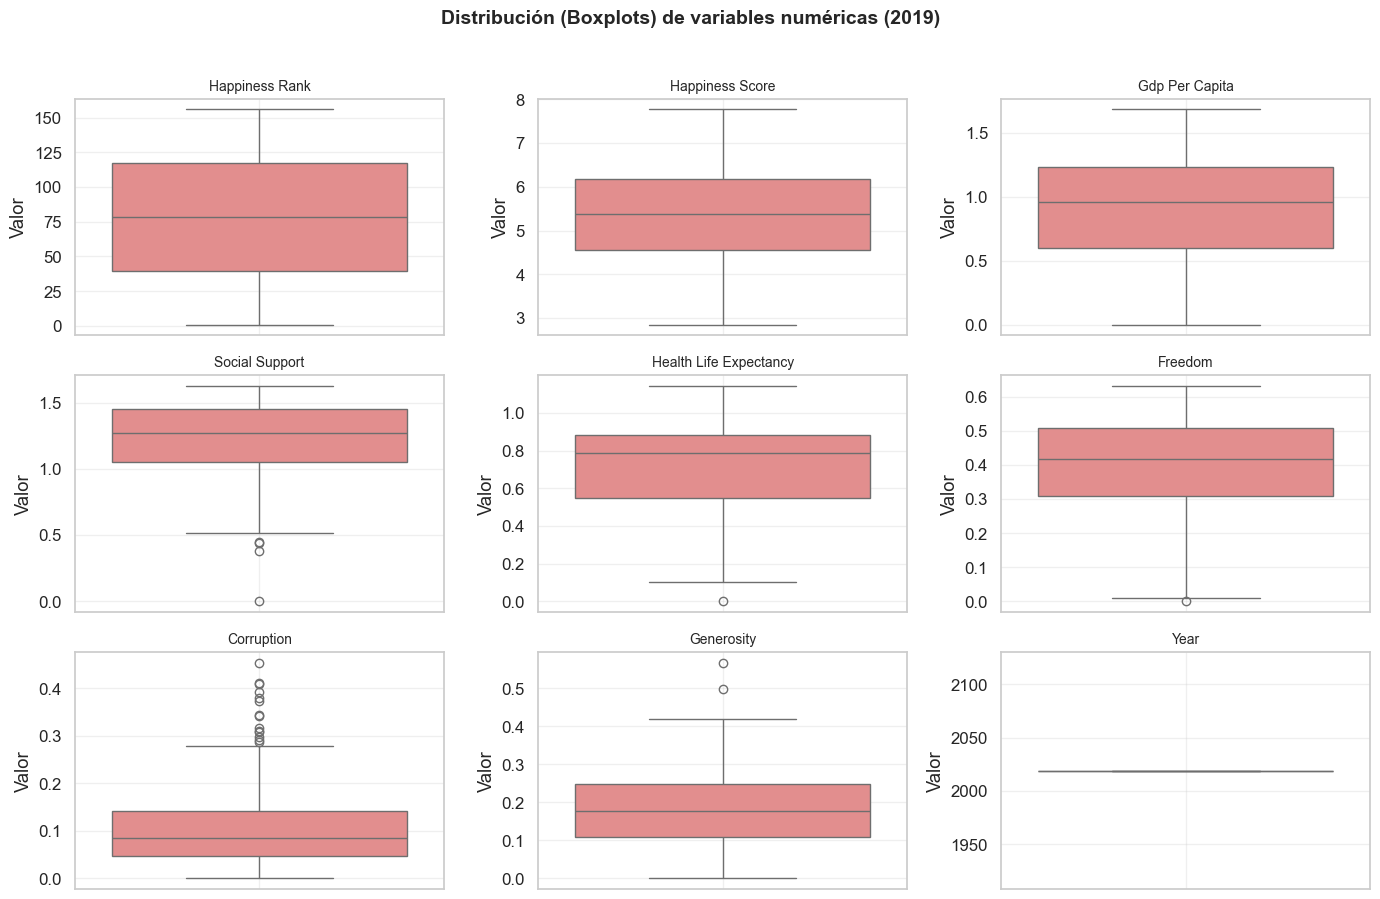

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.1)

for year, df in dfs_clean.items():
    print(f"\n BOXPLOTS DE VARIABLES NUMÉRICAS ({year}) ")

    # Seleccionar columnas numéricas
    numeric_cols = df.select_dtypes(include=["float64", "int64"]).columns
    n_cols = 3  # Número de boxplots por fila
    n_rows = int(len(numeric_cols) / n_cols) + 1

    # Crear figura
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, n_rows * 3))
    axes = axes.flatten()

    for i, col in enumerate(numeric_cols):
        sns.boxplot(y=df[col], color="lightcoral", ax=axes[i])
        axes[i].set_title(col.replace("_", " ").title(), fontsize=10)
        axes[i].set_xlabel("")
        axes[i].set_ylabel("Valor")
        axes[i].grid(alpha=0.3)

    # Eliminar subplots vacíos
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    fig.suptitle(f"Distribución (Boxplots) de variables numéricas ({year})", fontsize=14, weight="bold")
    plt.tight_layout(rect=[0, 0, 1, 0.97])
    plt.show()


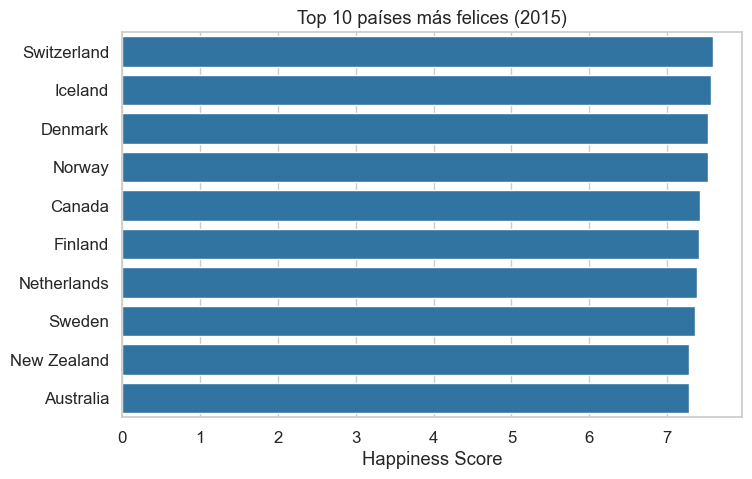

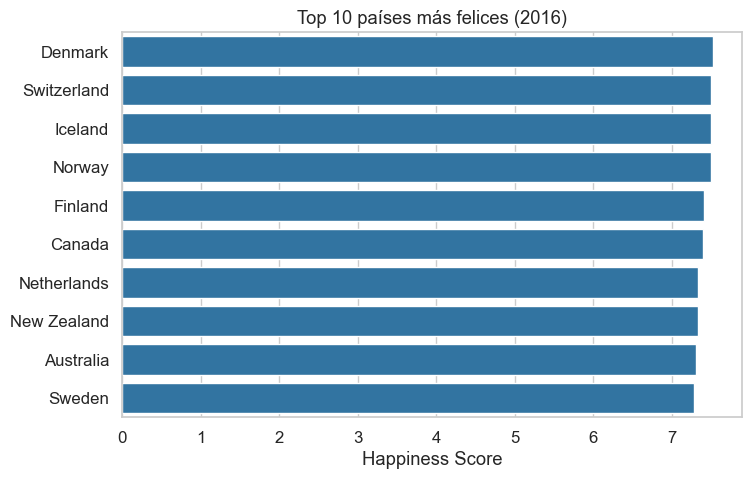

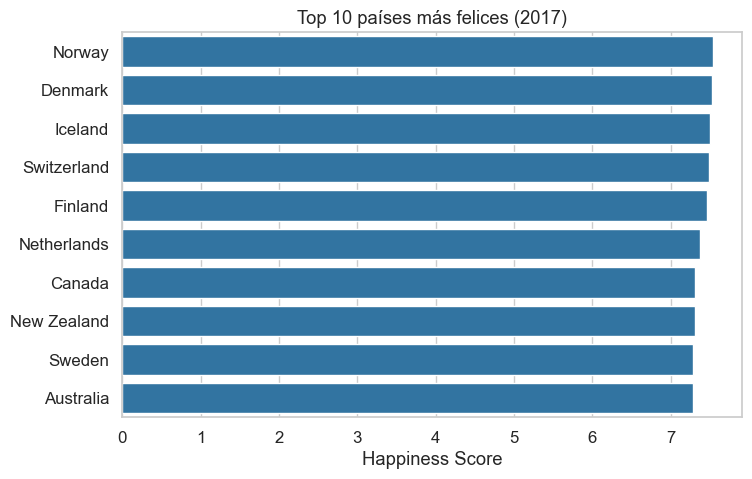

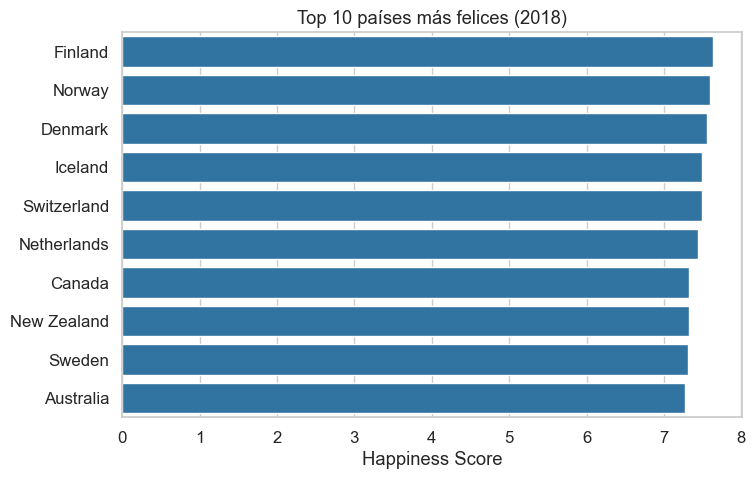

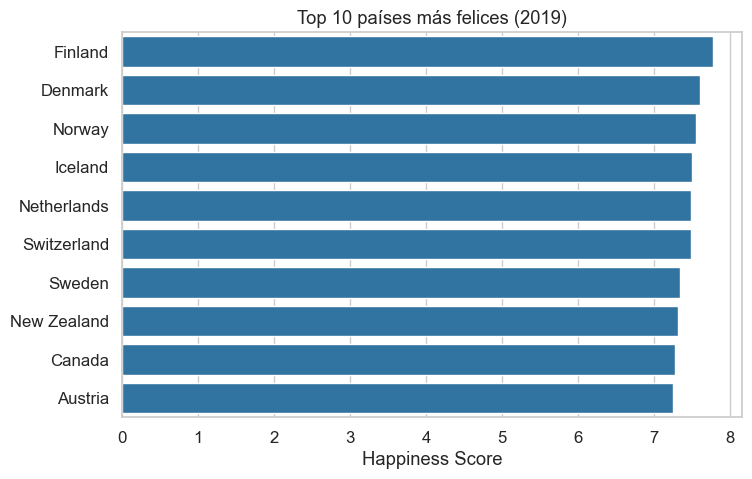

In [46]:
for year, df in dfs_clean.items():
    top10 = df.nlargest(10, "happiness_score")[["country", "happiness_score"]]
    plt.figure(figsize=(8,5))
    sns.barplot(x="happiness_score", y="country", data=top10)
    plt.title(f"Top 10 países más felices ({year})")
    plt.xlabel("Happiness Score")
    plt.ylabel("")
    plt.show()

### Transform

In [47]:
for year, df in dfs_clean.items():
    if df.isna().sum().sum() > 0:
        print(f"\n Detectados valores nulos en {year}. Aplicando imputación predictiva...")

        num_cols = df.select_dtypes(include=["float64", "int64"]).columns

        imputer = IterativeImputer(random_state=42)
        df[num_cols] = imputer.fit_transform(df[num_cols])

        dfs_clean[year] = df

        print(f"Imputación aplicada correctamente al año {year}.")
    else:
        print(f"{year}: sin valores nulos detectados.")

2015: sin valores nulos detectados.
2016: sin valores nulos detectados.
2017: sin valores nulos detectados.

 Detectados valores nulos en 2018. Aplicando imputación predictiva...
Imputación aplicada correctamente al año 2018.
2019: sin valores nulos detectados.


In [ ]:
def validar_paises(dfs_clean):
    all_invalids = {}

    for year, df in dfs_clean.items():
        print(f"\n🌍 Validando nombres de países ({year})...")

        df["country"] = df["country"].astype(str).str.strip()

        nulos = df["country"].isna().sum()
        vacios = (df["country"].str.strip() == "").sum()
        na_text = df["country"].str.lower().isin(["n/a", "na", "none", "nan"]).sum()

        print(f" - Nulos: {nulos}, Vacíos: {vacios}, Texto N/A: {na_text}")


        valid_names = [c.name.lower() for c in pycountry.countries]
        invalids = [
            name for name in df["country"].str.lower().unique()
            if name not in valid_names
        ]

        if invalids:
            print(f" ⚠️ {len(invalids)} nombres no reconocidos en {year}:")
            print(invalids)
            all_invalids[year] = invalids
        else:
            print("Todos los países son válidos.")

    return all_invalids

invalidos = validar_paises(dfs_clean)


🌍 Validando nombres de países (2015)...
 - Nulos: 0, Vacíos: 0, Texto N/A: 0
 ⚠️ 22 nombres no reconocidos en 2015:
['venezuela', 'czech republic', 'taiwan', 'south korea', 'bolivia', 'moldova', 'russia', 'north cyprus', 'kosovo', 'vietnam', 'turkey', 'somaliland region', 'macedonia', 'laos', 'swaziland', 'palestinian territories', 'iran', 'congo (kinshasa)', 'congo (brazzaville)', 'tanzania', 'ivory coast', 'syria']

🌍 Validando nombres de países (2016)...
 - Nulos: 0, Vacíos: 0, Texto N/A: 0
 ⚠️ 21 nombres no reconocidos en 2016:
['czech republic', 'taiwan', 'venezuela', 'moldova', 'russia', 'south korea', 'bolivia', 'north cyprus', 'kosovo', 'turkey', 'macedonia', 'vietnam', 'somaliland region', 'laos', 'iran', 'palestinian territories', 'congo (kinshasa)', 'congo (brazzaville)', 'ivory coast', 'tanzania', 'syria']

🌍 Validando nombres de países (2017)...
 - Nulos: 0, Vacíos: 0, Texto N/A: 0
 ⚠️ 20 nombres no reconocidos en 2017:
['czech republic', 'taiwan province of china', 'russ

C:\Users\maria\AppData\Local\Temp\ipykernel_25204\1410895330.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["country"] = df["country"].astype(str).str.strip()
C:\Users\maria\AppData\Local\Temp\ipykernel_25204\1410895330.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["country"] = df["country"].astype(str).str.strip()


In [ ]:
# Diccionario de equivalencias a nombres ISO válidos
correcciones_paises = {
    "czech republic": "Czechia",
    "taiwan": "Taiwan, Province of China",
    "taiwan province of china": "Taiwan, Province of China",
    "south korea": "Korea, Republic of",
    "north korea": "Korea, Democratic People's Republic of",
    "bolivia": "Bolivia, Plurinational State of",
    "moldova": "Moldova, Republic of",
    "russia": "Russian Federation",
    "north cyprus": "Cyprus",
    "northern cyprus": "Cyprus",
    "kosovo": "Serbia",  # No ISO oficial, asignado a Serbia (puedes dejarlo como 'Kosovo')
    "turkey": "Türkiye",
    "somaliland region": "Somalia",
    "macedonia": "North Macedonia",
    "laos": "Lao People's Democratic Republic",
    "swaziland": "Eswatini",
    "palestinian territories": "Palestine, State of",
    "iran": "Iran, Islamic Republic of",
    "congo (kinshasa)": "Congo, The Democratic Republic of the",
    "congo (brazzaville)": "Congo",
    "tanzania": "Tanzania, United Republic of",
    "ivory coast": "Côte d'Ivoire",
    "syria": "Syrian Arab Republic",
    "hong kong s.a.r., china": "Hong Kong",
    "trinidad & tobago": "Trinidad and Tobago",
    "venezuela": "Venezuela, Bolivarian Republic of",
    "vietnam": "Viet Nam"
}

In [50]:
for year, df in dfs_clean.items():
    df["country"] = df["country"].str.strip().str.lower().replace(correcciones_paises)
    df["country"] = df["country"].str.title()  # capitalizar bonito
    dfs_clean[year] = df
    print(f"🌎 Correcciones aplicadas a {year}.")

🌎 Correcciones aplicadas a 2015.
🌎 Correcciones aplicadas a 2016.
🌎 Correcciones aplicadas a 2017.
🌎 Correcciones aplicadas a 2018.
🌎 Correcciones aplicadas a 2019.


C:\Users\maria\AppData\Local\Temp\ipykernel_25204\1658548129.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["country"] = df["country"].str.strip().str.lower().replace(correcciones_paises)
C:\Users\maria\AppData\Local\Temp\ipykernel_25204\1658548129.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["country"] = df["country"].str.title()  # capitalizar bonito


In [51]:
invalidos_corr = validar_paises(dfs_clean)


🌍 Validando nombres de países (2015)...
 - Nulos: 0, Vacíos: 0, Texto N/A: 0
Todos los países son válidos.

🌍 Validando nombres de países (2016)...
 - Nulos: 0, Vacíos: 0, Texto N/A: 0
Todos los países son válidos.

🌍 Validando nombres de países (2017)...
 - Nulos: 0, Vacíos: 0, Texto N/A: 0
Todos los países son válidos.

🌍 Validando nombres de países (2018)...
 - Nulos: 0, Vacíos: 0, Texto N/A: 0
Todos los países son válidos.

🌍 Validando nombres de países (2019)...
 - Nulos: 0, Vacíos: 0, Texto N/A: 0
Todos los países son válidos.


C:\Users\maria\AppData\Local\Temp\ipykernel_25204\1410895330.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["country"] = df["country"].astype(str).str.strip()
C:\Users\maria\AppData\Local\Temp\ipykernel_25204\1410895330.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["country"] = df["country"].astype(str).str.strip()


In [52]:
os.makedirs("data/processed", exist_ok=True)

df_all = pd.concat(dfs_clean.values(), ignore_index=True)

df_all.columns = (
    df_all.columns.str.lower()
    .str.strip()
    .str.replace(" ", "_")
    .str.replace(r"[\(\)\.]", "", regex=True)
)

df_all = df_all.rename(columns={
    "happiness_score": "score",
    "corruption": "perceptions_of_corruption"
})

cols_finales = [
    "country",
    "score",
    "gdp_per_capita",
    "social_support",
    "health_life_expectancy",
    "freedom",
    "perceptions_of_corruption",
    "year"
]

cols_existentes = [c for c in cols_finales if c in df_all.columns]
df_final = df_all[cols_existentes].copy()

df_final["year"] = pd.to_numeric(df_final["year"], errors="coerce").astype("Int64")

df_final = df_final.drop_duplicates(subset=["country", "year"])
df_final = df_final.dropna(subset=["score", "year"])

out_path = "data/processed/happiness_model.csv"
df_final.to_csv(out_path, index=False)

print(f"Dataset limpio guardado en: {out_path}")
print(f"Filas: {len(df_final)}, Columnas: {len(df_final.columns)}")
print(f" Columnas finales: {list(df_final.columns)}")

Dataset limpio guardado en: data/processed/happiness_model.csv
Filas: 771, Columnas: 8
 Columnas finales: ['country', 'score', 'gdp_per_capita', 'social_support', 'health_life_expectancy', 'freedom', 'perceptions_of_corruption', 'year']
